In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      
      capture.textContent = 'Toma Foto :)';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [6]:
import numpy as np
from keras.preprocessing.image  import load_img, img_to_array
from keras.models import load_model
# CATEGORIES = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

#PARAMETROS DE IMAGEN
longitud1, altura1 = 350,350
longitud, altura = 224,224

#CARGANDO LOS MODELOS.
vgg16 =   load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_VGG16.h5")
vgg19 =   load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_VGG19.h5")
mobileNet =   load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_MobileNet.h5")
mobileNetv2 =   load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/model_MobileNetV2.h5")
miModelo =   load_model("/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/Modelos/modeloneurona.h5")
#/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final


def predict(file,model,nombre, tam = 224):
  x = load_img(file, target_size=(tam,tam))
  x = img_to_array(x)
  x = np.expand_dims(x,axis=0)
  arreglo = model.predict(x) #ARREGLO DE DOS DIMENCIONES
  resultado = arreglo[0]
  respuesta = np.argmax(resultado)
  result(resultado,respuesta,nombre)

def miPredict(file,model,nombre, tam = 350):
  x = load_img(file, target_size=(tam,tam),color_mode='grayscale')
  x = img_to_array(x)
  x = np.expand_dims(x,axis=0)
  arreglo = model.predict(x) #ARREGLO DE DOS DIMENCIONES
  resultado = arreglo[0]
  respuesta = np.argmax(resultado)
  result(resultado,respuesta,nombre)  

def result(resultado,respuesta,nombre):
  print('-----------',nombre,'-------------')
  if respuesta == 0:
    print('Enfado')
  elif respuesta == 1:
    print('Asco')
  elif respuesta == 2:
    print('Felicidad')
  elif respuesta == 3:
    print('Neutral')
  elif respuesta == 4:
    print('Tristeza')
  elif respuesta == 5:
    print('Sorpresa')        
  # print(resultado,'  --  ', respuesta)
  print('---------------------------------')



<IPython.core.display.Javascript object>

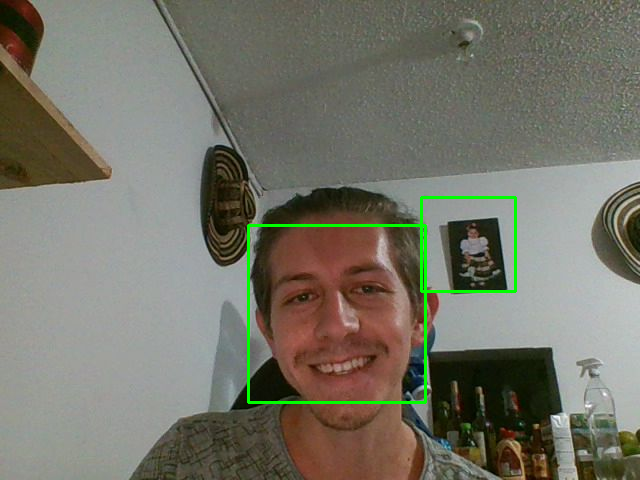

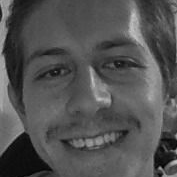

----------- VGG16 -------------
Sorpresa
---------------------------------
----------- VGG19 -------------
Neutral
---------------------------------
----------- mobileNet -------------
Felicidad
---------------------------------
----------- mobileNetv2 -------------
Felicidad
---------------------------------
----------- miModelo -------------
Felicidad
---------------------------------


In [12]:
import cv2
import numpy as np
from IPython.display import Image
cap = take_photo()
faceClassif = cv2.CascadeClassifier('/content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final/haarcascade_frontalface_default.xml')

image = cv2.imread('photo.jpg')
gray = cv2.imread('photo.jpg',0)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceClassif.detectMultiScale(gray,
                                      scaleFactor=1.1,
                                      minNeighbors=5,
                                      minSize=(10,10),
                                      maxSize=(200,200))

for(x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0),2)
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(image)    
# cv2_imshow(gray)
#RECORTANDO
imageOut = gray[y:y+h,x:x+w]  
cv2_imshow(imageOut)
cv2.imwrite('evaluate.jpg', imageOut)

#PREDICCION
predict('evaluate.jpg',vgg16,"VGG16")
predict('evaluate.jpg',vgg19,"VGG19")
predict('evaluate.jpg',mobileNet,"mobileNet")
predict('evaluate.jpg',mobileNetv2,"mobileNetv2")
miPredict('evaluate.jpg',miModelo,"miModelo")
